#### The objective of this notebook is to briefly demonstrate some advantages of: 

1. Scaling the data and observing the effects on accuracy of Eucledian distance based algorithm (in this case KNN)

2. PCA for exploratory data analysis, dimensionality reduction, and KMeans boundary smoothing. It is basically a case study for 2 data sets with with different dimensions

# 1. Import datasets from the SK library (iris, cancer)

##### Importing essential libraries & sk datasets 

In [1]:
# Importing the datasets
from sklearn.datasets import (load_breast_cancer, load_iris)

In [2]:
# Assigning unprocessed data to variables
rawIris=load_iris()
rawCancer=load_breast_cancer()

In [3]:
# importing libraries to aid in the processing
import numpy as np
import pandas as pd

##### Function for automating conversion of sk datasets to pandas dataframes

In [4]:
#This function converts sk datasets to pandas dataframes
#to arrange data in a tabular fashion and perform some operations and manipulations on the data later on.

def ds_to_df(skdata):
    headers=list(skdata.feature_names)
    labels=list(skdata.target_names)
    #This dictionary will store the data and at the end converted into a dataframe including target and target encoded
    df={}
    
    for i, h in enumerate(headers):
        df[h]=skdata.data[:,i]
    
    df['TargetEnc']=skdata.target
    labels_dict={}
    
    for i, h in enumerate(labels):
        labels_dict[i]=h
    
    df=pd.DataFrame(df)
    df['Target']=df['TargetEnc']
    df['Target'].replace(labels_dict, inplace=True)
    
    return df

### Iris sample and feature description

In [5]:
#Iris dataset to dataframe
dataIris=ds_to_df(rawIris)
dataIris.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TargetEnc,Target
64,5.6,2.9,3.6,1.3,1,versicolor
124,6.7,3.3,5.7,2.1,2,virginica
5,5.4,3.9,1.7,0.4,0,setosa
53,5.5,2.3,4.0,1.3,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa


In [6]:
# Basic statistics
dataIris.drop(['TargetEnc','Target'], axis='columns', inplace=False).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Cancer sample and feature description

In [7]:
#Cancer dataset to dataframe
dataCancer=ds_to_df(rawCancer)
dataCancer.sample(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TargetEnc,Target
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.080250,0.2069,0.07682,...,108.80,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310,0,malignant
245,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.030700,0.1737,0.06440,...,73.68,402.8,0.15150,0.1026,0.1181,0.06736,0.2883,0.07748,1,benign
77,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.108000,0.2152,0.06673,...,150.10,1610.0,0.14780,0.5634,0.3786,0.21020,0.3751,0.11080,0,malignant
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.013740,0.1635,0.05586,...,105.80,819.7,0.09445,0.2167,0.1565,0.07530,0.2636,0.07676,1,benign
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,66.61,301.0,0.10860,0.1887,0.1868,0.02564,0.2376,0.09206,1,benign
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,0.05536,...,101.20,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698,1,benign


In [8]:
# Basic statistics
dataCancer.drop(['TargetEnc','Target'], axis='columns', inplace=False).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### In the preprocessing, I am assuming there are no missing values, therefore I'll just scale the data. In the Iris data case, scaling isn't as necessary as the Cancer data because the range doesn't vary too much. Scaling is used to make all features stand on the same level in terms of range.

# 2. Preprocessing (Scale)

In [9]:
# Import libraries for standard scaling transform
from sklearn.preprocessing import StandardScaler

### Iris scaled data

In [10]:
# Scale Iris data

# Separating out the features
x = dataIris.drop(['TargetEnc','Target'],axis='columns',inplace=False)
# Separating out the target
y_iris = dataIris[['TargetEnc','Target']]
# Standardizing the features
x_iris_scaled = pd.DataFrame(StandardScaler().fit_transform(x), columns=list(rawIris.feature_names))

In [11]:
# Iris scaled dataframe
dataIrisScaled=pd.merge(x_iris_scaled, y_iris, how='inner', left_on=x_iris_scaled.index, right_on=y_iris.index).drop(['key_0'], axis='columns')
dataIrisScaled.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TargetEnc,Target
53,-0.416010,-1.743357,0.137547,0.132510,1,versicolor
107,1.765012,-0.362176,1.444807,0.790671,2,virginica
83,0.189830,-0.822570,0.762758,0.527406,1,versicolor
47,-1.506521,0.328414,-1.340227,-1.315444,0,setosa
49,-1.021849,0.558611,-1.340227,-1.315444,0,setosa
99,-0.173674,-0.592373,0.194384,0.132510,1,versicolor


Mean and Standard Deviation are now approximatly 0 and 1 respectively (observed below)

In [12]:
# Iris scaled descriptive
dataIrisScaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TargetEnc
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


### Cancer scaled data

In [13]:
# Scale Cancer data

# Separating out the features
x = dataCancer.drop(['TargetEnc','Target'],axis='columns',inplace=False)
# Separating out the target
y_cancer = dataCancer[['TargetEnc','Target']]
# Standardizing the features
x_cancer_scaled = pd.DataFrame(StandardScaler().fit_transform(x),columns=list(rawCancer.feature_names))

In [14]:
# Iris scaled dataframe
dataCancerScaled=pd.merge(x_cancer_scaled, y_cancer, how='inner', left_on=x_cancer_scaled.index, right_on=y_cancer.index).drop(['key_0'], axis='columns')
dataCancerScaled.sample(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TargetEnc,Target
49,-0.181000,0.700529,-0.208383,-0.267030,-0.629123,-0.518531,-0.518386,-0.388951,-0.009560,-0.796355,...,-0.246067,-0.319559,-0.708765,-0.529046,-0.211036,0.206987,-0.048138,-0.818814,1,benign
62,0.034851,0.665623,0.183336,-0.026135,0.607733,1.828041,1.565613,0.970134,0.501572,1.434954,...,0.352628,0.138729,1.386591,2.356484,2.015015,0.972885,-0.091818,1.621144,0,malignant
478,-0.749028,-1.093640,-0.740560,-0.710995,0.586383,-0.418088,-0.448455,-0.753936,-0.119089,0.417114,...,-0.751235,-0.725988,0.124117,-0.338840,-0.060394,-0.613574,0.065106,0.435246,1,benign
25,0.855652,-0.672441,0.989840,0.733241,1.582699,2.335941,1.683630,2.351917,4.484751,1.606484,...,1.344497,1.020322,0.970150,0.894635,0.542655,2.137720,1.885110,1.216609,0,malignant
194,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,...,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804,0,malignant
413,0.245021,0.656315,0.229057,0.110382,-0.797785,-0.034889,-0.253727,-0.262045,0.483317,-0.519922,...,0.087534,-0.023702,-1.081370,0.510406,0.188118,0.246576,0.424254,0.474591,1,benign


Mean and Standard Deviation are now approximatly 0 and 1 respectively (observed below)

In [15]:
# Iris scaled descriptive
dataCancerScaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TargetEnc
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,5.073075e-16,...,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


# 3. Possible effects of scaling on accuracy

In [16]:
# Import KNN library for scaleVSno-scale comparison
from sklearn.neighbors import KNeighborsClassifier

# Import function for splitting training from test set
from sklearn.model_selection import train_test_split

# Import plotting library
import matplotlib.pyplot as plt

In [17]:
# function for computing the best number of neighbors with respect to the best training set score
def train_test_score(data):
    n=[i for i in range(2,22) if i%2!=0]
    train_score=[]
    test_score=[]
    
    x=data.drop(['Target', 'TargetEnc'], axis='columns')
    y=data.Target
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4, stratify=y)
    
    for i in n:
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        i_train_score=knn.score(x_train,y_train)
        i_test_score=knn.score(x_test,y_test)
        train_score.append(i_train_score)
        test_score.append(i_test_score)
        #print('# Neigh: {:.0f}, Score: {:.3f}\n'.format(i,n_score))
          
    table_dict={'neighbors':n, 'train_score':train_score, 'test_score':test_score}
    table_df=pd.DataFrame(table_dict)
    print(table_df)
    
    plt.figure(figsize=(10,8), dpi=60)
    plt.plot(table_df.neighbors, table_df.train_score, linestyle='--', marker='v', label='train_score')
    plt.plot(table_df.neighbors, table_df.test_score, linestyle='--', marker='^', label='test_score')
    plt.legend(loc='best')
    plt.title('Scores in function of neighbors', fontsize=20)
    plt.xlabel('#Neighbors', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.xticks(n)
    plt.grid(True, color='gray')
    plt.show()
    plt.clf()
    
    print('Best test score: {:.3f}'.format(np.max(test_score)))
    

### Iris data performance a beforeVSafter scaling 

   neighbors  train_score  test_score
0          3     0.933333    1.000000
1          5     0.955556    0.983333
2          7     0.955556    0.983333
3          9     0.966667    0.966667
4         11     0.944444    0.966667
5         13     0.955556    0.966667
6         15     0.944444    0.966667
7         17     0.933333    0.966667
8         19     0.944444    0.950000
9         21     0.922222    0.950000


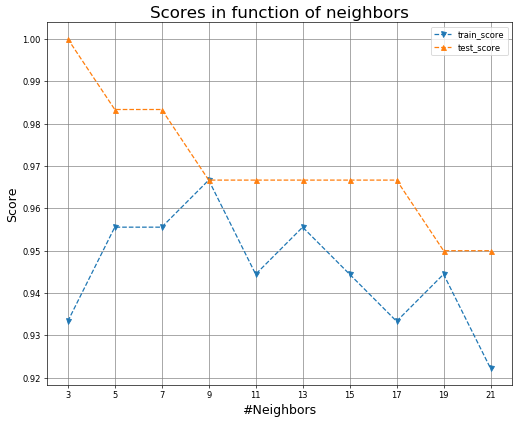

Best test score: 1.000


<Figure size 432x288 with 0 Axes>

In [18]:
train_test_score(dataIris)

   neighbors  train_score  test_score
0          3     0.955556    0.966667
1          5     0.955556    0.966667
2          7     0.944444    0.983333
3          9     0.944444    0.950000
4         11     0.944444    0.950000
5         13     0.933333    0.966667
6         15     0.944444    0.933333
7         17     0.955556    0.950000
8         19     0.922222    0.900000
9         21     0.933333    0.900000


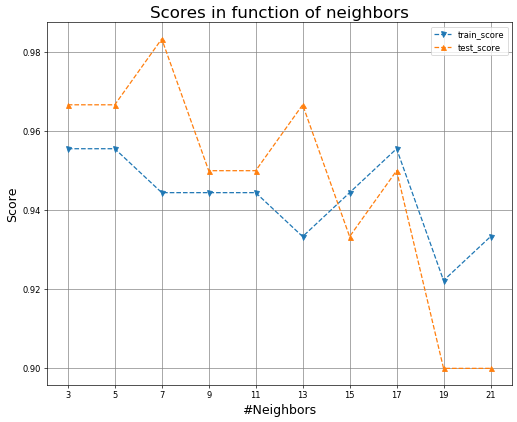

Best test score: 0.983


<Figure size 432x288 with 0 Axes>

In [19]:
train_test_score(dataIrisScaled)

### Cancer data performance a beforeVSafter scaling 

   neighbors  train_score  test_score
0          3     0.961877    0.934211
1          5     0.935484    0.921053
2          7     0.935484    0.929825
3          9     0.929619    0.929825
4         11     0.929619    0.929825
5         13     0.929619    0.925439
6         15     0.932551    0.921053
7         17     0.932551    0.921053
8         19     0.932551    0.921053
9         21     0.926686    0.916667


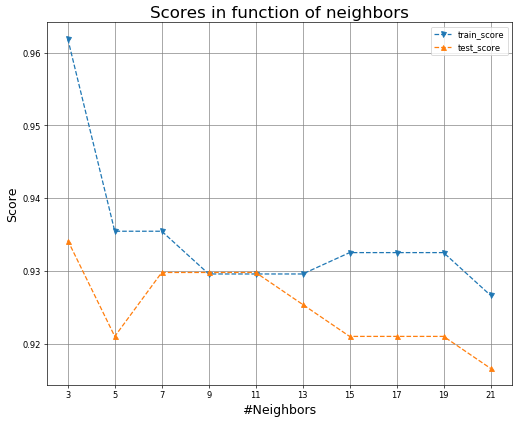

Best test score: 0.934


<Figure size 432x288 with 0 Axes>

In [20]:
train_test_score(dataCancer)

   neighbors  train_score  test_score
0          3     0.988270    0.947368
1          5     0.976540    0.942982
2          7     0.976540    0.947368
3          9     0.976540    0.956140
4         11     0.970674    0.960526
5         13     0.956012    0.951754
6         15     0.953079    0.956140
7         17     0.950147    0.956140
8         19     0.947214    0.956140
9         21     0.947214    0.951754


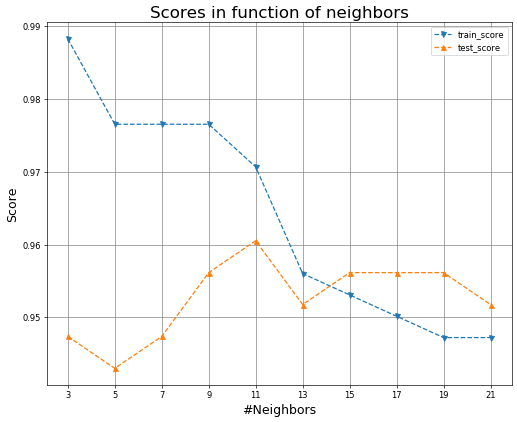

Best test score: 0.961


<Figure size 432x288 with 0 Axes>

In [21]:
train_test_score(dataCancerScaled)

#### Here it is hard to make any conclusions with datasets this perfect. However, it cant hurt scaling your data. It puts features under the same mean and standard. It is likely to improve accuracy of models that use Eucledean distance when you accuracy isn't already very high, which is the case of both datasets:
##### 1. The test_score decreased in Iris after scaling by chance most likely, because the accuracy was already very high, and the feature values had close ranges.
##### 2. In the Cancer data, accuracy was more likely to improve due to its different numerical features. Therefore, scaling improved the model. 

# 3. PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

In [22]:
# Import necessary library for PCA transform
from sklearn.decomposition import PCA

In [23]:
# Labels for the components
PC_label=['PC_1','PC_2']

### Iris 2 principal components data

In [24]:
PCA_Iris = PCA(n_components=2)
x_iris_scaled_PCA = PCA_Iris.fit_transform(x_iris_scaled)
x_iris_scaled_PCA=pd.DataFrame(x_iris_scaled_PCA, columns=PC_label)

In [25]:
# Iris PCA dataframe
dataIrisScaledPCA=pd.merge(x_iris_scaled_PCA, y_iris['Target'], how='inner', left_on=x_iris_scaled_PCA.index, right_on=y_iris.index).drop(['key_0'], axis='columns')
dataIrisScaledPCA.sample(6)

,PC_1,PC_2,Target
37,-2.527332,0.592293,setosa
29,-2.265261,-0.337732,setosa
61,0.440693,-0.063295,versicolor
96,0.227717,-0.384920,versicolor
32,-2.614948,1.793576,setosa
66,0.350252,-0.196312,versicolor


In [26]:
print('Explained variation per principal component: {}'.format(PCA_Iris.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762]


### Cancer 2 principal components data

In [27]:
PCA_Cancer = PCA(n_components=2)
x_cancer_scaled_PCA = PCA_Cancer.fit_transform(x_cancer_scaled)
x_cancer_scaled_PCA = pd.DataFrame(x_cancer_scaled_PCA, columns=PC_label)

In [28]:
# Cancer PCA dataframe
dataCancerScaledPCA=pd.merge(x_cancer_scaled_PCA, y_cancer['Target'], how='inner', left_on=x_cancer_scaled_PCA.index, right_on=y_cancer.index).drop(['key_0'], axis='columns')
dataCancerScaledPCA.sample(6)

,PC_1,PC_2,Target
53,3.302551,-1.130938,malignant
387,-3.424518,-2.445518,benign
338,-3.067695,1.135838,benign
157,-0.751603,-3.070649,benign
558,-0.098667,-0.213560,benign
260,3.378251,-3.371228,malignant


In [29]:
print('Explained variation per principal component: {}'.format(PCA_Cancer.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


#### OBS: As you can see, the fraction of explained variation is much lower for the Cancer PCs than the Iris PCS. That is intuitively because there is more loss of explanation converting 30 features to PCs than converting only 4 features 

# 4. Exploratory Data Analysis (EDA) of projected PCs

In [30]:
# Import the libraries to plot
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# function for plotting the PCA graphs (2 components only)
def plot_PC(dataPCA):
    
    plt.figure(figsize=(10,8), dpi=100)
    sns.scatterplot(x=dataPCA.columns[0], y=dataPCA.columns[1], hue=dataPCA.columns[2], style=dataPCA.columns[2], data=dataPCA)
    plt.legend(loc='best')
    
    plt.show()
    plt.clf()

### Iris PC plot

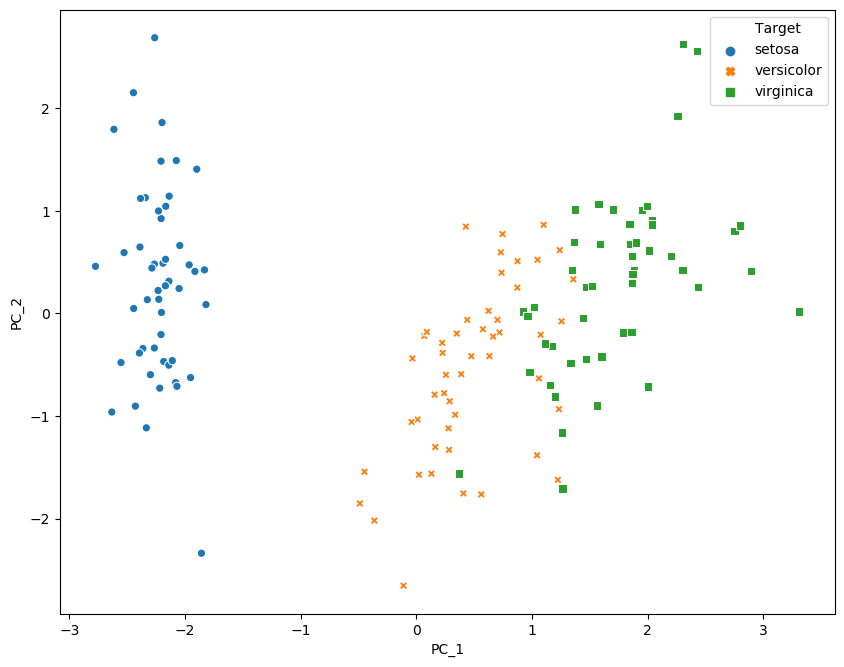

<Figure size 432x288 with 0 Axes>

In [32]:
plot_PC(dataIrisScaledPCA)

### Cancer PC plot

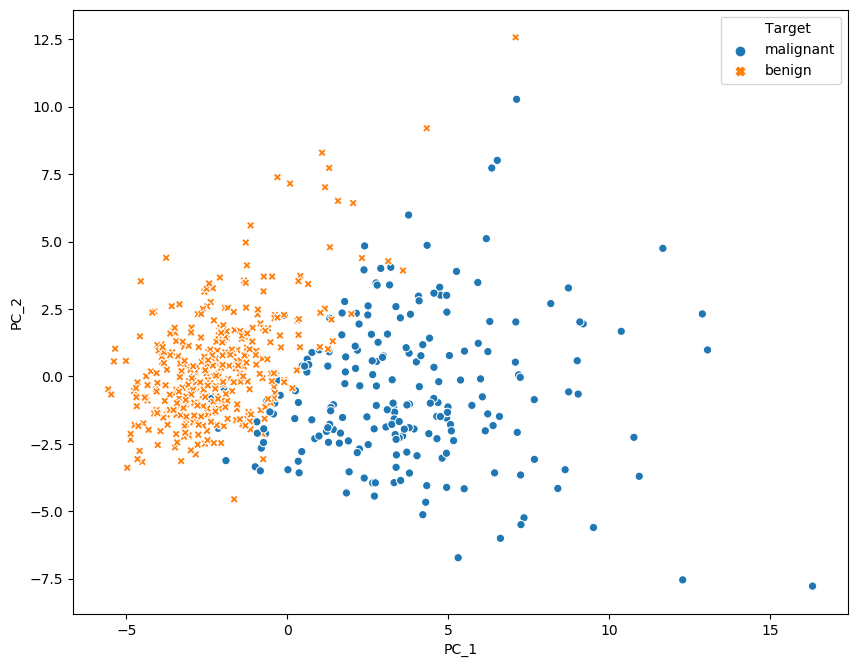

<Figure size 432x288 with 0 Axes>

In [33]:
plot_PC(dataCancerScaledPCA)

#### In the 2 PC graphs above we can visualize the clusters formed by the classes. If a clustering model from unsupervised learning were to classify these 2 datasets exactly the way it is, it would be overfitting seeing that it is not linearly seperable due to classes overlaping each other's boundary (e.g. versicolor&virginica, malignant&benign). In the next section we'll create a model a bit different from reality and draw clear boundaries between clusters using KMeans.

# 5. KMeans to smoothen the boundary between clusters

In [34]:
# Import KMeans library
from sklearn.cluster import KMeans

# Import this function to facilitate verification (class labels before KMeans = class labels after KMeans)
from sklearn.metrics import confusion_matrix

In [35]:
# function for modeling tha data with KMeans, correct labels set by default and plot the fitted data
def cluster_plot(data_no_label, y_label, n_clus, skdataset):
    
    km = KMeans(n_clusters=n_clus, n_init=50, max_iter=1000)
    km.fit(data_no_label)
    
    correct=0
    for i in range(len(y_label)):
        predict_me = np.array(data_no_label.iloc[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = km.predict(predict_me)
        if prediction[0] == y_label['TargetEnc'][i]:
            correct += 1 
            
    predictions=pd.DataFrame(km.predict(np.array(data_no_label)), columns=['TargetEnc'])
    score=100*correct/len(y_label)
    

    matrix=confusion_matrix(predictions, y_label.TargetEnc)
    TP=[]
    for i in range(len(matrix)):
        TP.append(matrix[i,i])
        
    print('Initial score before label correction: {:.2f} %'.format(score))
    print(matrix)
    correction=input('Correct order: ')
    
    correction_replace=[]
    target_enc_correct={}
    for i, h in enumerate(correction):
        target_enc_correct[i]=h
        correction_replace.append(int(h))
            
    target_correct={}
    for i, h in zip(correction_replace,list(skdataset.target_names)):
        target_correct[i]=h
    
    predictions['TargetEnc']=predictions['TargetEnc'].astype(int).replace(target_enc_correct)
    predictions['Target']=predictions['TargetEnc'].astype(int).replace(target_correct)


            
    data_with_label=data_no_label.copy()
    data_with_label['TargetEnc']=predictions['TargetEnc'].astype(int)
    data_with_label['Target']=predictions['Target']
    
    
    plt.figure(figsize=(10,8), dpi=100)
    sns.scatterplot(x=data_with_label.columns[0], y=data_with_label.columns[1], hue=data_with_label.columns[3], style=data_with_label.columns[3], data=data_with_label)
    plt.legend(loc='best')
    
    plt.show()
    plt.clf()
    
    print('Final score after label correction: {:.2f} %'.format(100*np.sum(data_with_label['TargetEnc']==y_label['TargetEnc'])/len(y_label)))
    
    return data_with_label

### Iris KMeans smoothing model plot

#### Attention! In the function below it is required an input from the user based on the confusion_matrix displayed in order to correct the labels set by defaul by the KMeans model.

For example:

* If the labels are all correct, type **012**
* If first and second label are wrong, then type **102**
* If they are all wrong you should type **201** or **120**. If the one you picked didn't give a high accuracy, run the cell again.

Initial score before label correction: 50.00 %
[[50  0  0]
 [ 0 11 36]
 [ 0 39 14]]
Correct order: 021


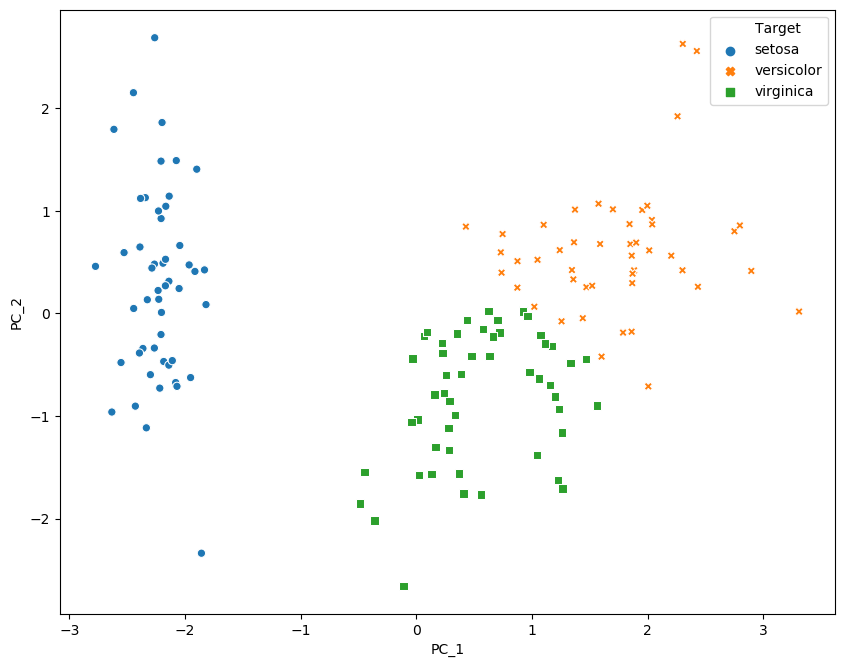

Final score after label correction: 83.33 %


<Figure size 432x288 with 0 Axes>

In [36]:
# The initial part of this code is to repair the relationship between labels and classes.
# The correction is done manually after looking at the confusion matrix.
# The initial score is also an indicator of wrong class labeling by the KMeans algorithm.
KM_Iris=cluster_plot(x_iris_scaled_PCA, y_iris, 3, rawIris)

In [37]:
KM_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC_1       150 non-null    float64
 1   PC_2       150 non-null    float64
 2   TargetEnc  150 non-null    int32  
 3   Target     150 non-null    object 
dtypes: float64(2), int32(1), object(1)
memory usage: 4.2+ KB


### Cancer KMeans smoothing model plot

#### Attention! In the function below it is required an input from the user based on the confusion_matrix displayed in order to correct the labels set by defaul by the KMeans model.

For example:

* If the labels are all correct, type **01**. If not, just type **01** if the initial scory was high.

Initial score before label correction: 9.31 %
[[ 37 341]
 [175  16]]
Correct order: 10


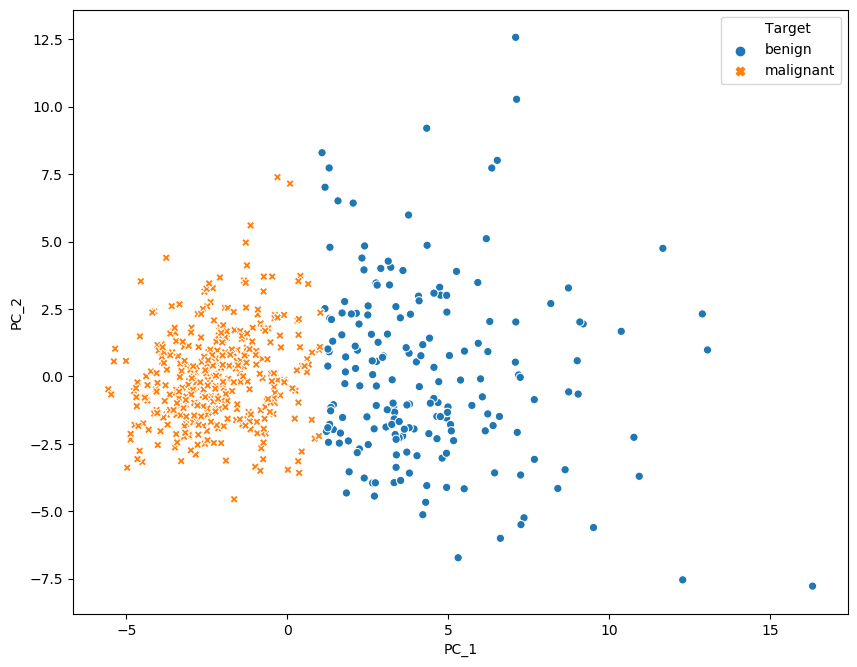

Final score after label correction: 90.69 %


<Figure size 432x288 with 0 Axes>

In [38]:
# The initial part of this code is to repair the relationship between labels and classes.
# The correction is done manually after looking at the confusion matrix.
# The initial score is also an indicator of wrong class labeling by the KMeans algorithm.
KM_Cancer=cluster_plot(x_cancer_scaled_PCA, y_cancer, 2, rawCancer)

In [39]:
KM_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC_1       569 non-null    float64
 1   PC_2       569 non-null    float64
 2   TargetEnc  569 non-null    int32  
 3   Target     569 non-null    object 
dtypes: float64(2), int32(1), object(1)
memory usage: 15.7+ KB


#### We can observe that there is a more clear boundary between clusters in the fitted data compared to original plotted data in section 4.

#### In the next section, we will do a small exercise to compare the training score before and after KMeans re-classification (using KNN)

#### The final score shows the error compared to the classification of the original data before KMeans smoothing

# 6. Comparison of accuracy before KMeans and after KMeans (using KNN as basemodel)

In [40]:
# Import required libraries to model the data
from sklearn.neighbors import KNeighborsClassifier

# No need for train_test_split, because we are comparing the performance only on the training set

In [41]:
# function for computing the best number of neighbors with respect to the best training set score (treated with PCA function)
def best_neighbors_score_PCA(data):
    n=n=[i for i in range(2,22) if i%2!=0]
    train_score=[]
    
    x=data.drop('Target', axis='columns')
    y=data.Target
    
    for i in n:
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x,y)
        n_score=knn.score(x,y)
        train_score.append(n_score)
        #print('# Neigh: {:.0f}, Score: {:.3f}\n'.format(i,n_score))
        
    table_dict={'neighbors':n, 'train_score':train_score}
    table_df=pd.DataFrame(table_dict)
    print(table_df)
    
    plt.figure(figsize=(10,8), dpi=60)
    plt.plot(table_df.neighbors, table_df.train_score,  marker='x', label='train_score', color='red')
    plt.xticks(n)
    plt.legend(loc='best')
    plt.title('Score in function of neighbors', fontsize=20)
    plt.xlabel('#Neighbors', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.grid(True, color='gray')
    plt.show()
    plt.clf()
    
    print('Best train score: {:.3f}'.format(np.max(train_score)))

### Iris data score comparison

   neighbors  train_score
0          3     0.946667
1          5     0.946667
2          7     0.933333
3          9     0.926667
4         11     0.920000
5         13     0.926667
6         15     0.933333
7         17     0.933333
8         19     0.920000
9         21     0.913333


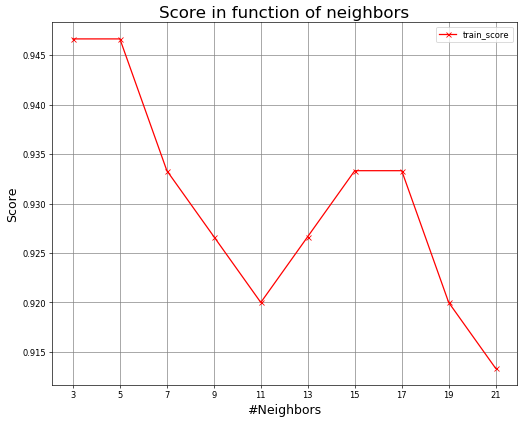

Best train score: 0.947


<Figure size 432x288 with 0 Axes>

In [42]:
# Iris score before KMeans
best_neighbors_score_PCA(dataIrisScaledPCA)

After smoothing, all # of neighbors picked offered 100% accuracy for the Iris dataset! (in the graph below)

   neighbors  train_score
0          3          1.0
1          5          1.0
2          7          1.0
3          9          1.0
4         11          1.0
5         13          1.0
6         15          1.0
7         17          1.0
8         19          1.0
9         21          1.0


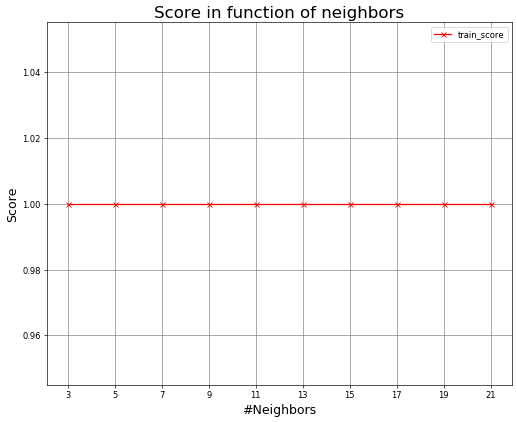

Best train score: 1.000


<Figure size 432x288 with 0 Axes>

In [43]:
# Iris after KMeans boundary smoothing
best_neighbors_score_PCA(KM_Iris)

### Cancer data score comparison

   neighbors  train_score
0          3     0.954306
1          5     0.952548
2          7     0.949033
3          9     0.952548
4         11     0.952548
5         13     0.957821
6         15     0.952548
7         17     0.952548
8         19     0.950791
9         21     0.950791


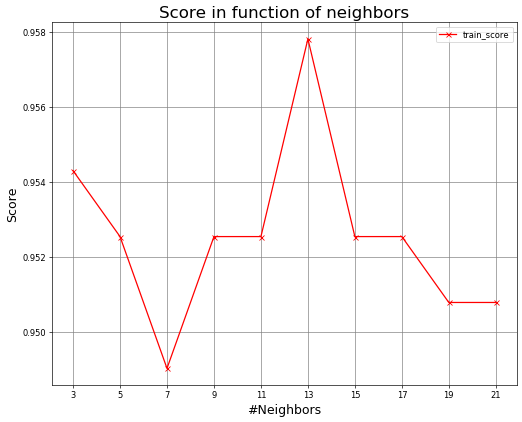

Best train score: 0.958


<Figure size 432x288 with 0 Axes>

In [44]:
# Cancer score before KMeans
best_neighbors_score_PCA(dataCancerScaledPCA)

After smoothing, one # of neighbors picked offered 100% accuracy (when neighbors was set to 3) for the Cancer dataset.(in the graph below)

   neighbors  train_score
0          3     1.000000
1          5     0.996485
2          7     0.996485
3          9     0.996485
4         11     0.996485
5         13     0.994728
6         15     0.998243
7         17     0.998243
8         19     0.996485
9         21     0.998243


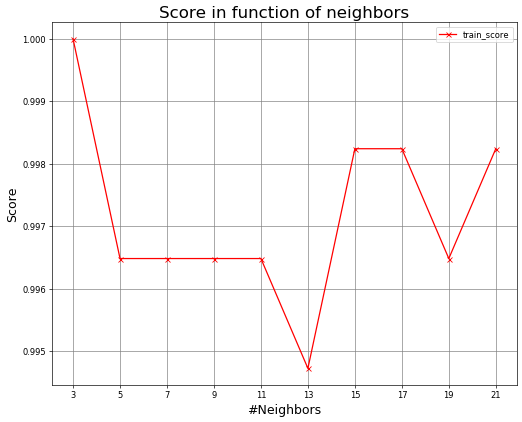

Best train score: 1.000


<Figure size 432x288 with 0 Axes>

In [45]:
# Cancer after KMeans boundary smoothing
best_neighbors_score_PCA(KM_Cancer)

####  For the use made with KMeans for this case study, we can see that it made the classes more seperable with at least one specific number of KNN neighbors after KMeans smoothing. Before the smoothing, the classes were not perfectly seperable with any KNN number of neighbors tested.